In [118]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import matplotlib as mpl

import matplotlib.colors as col
import matplotlib.cm as cm
%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [8]:
raw=pd.read_csv('DXYArea.csv',parse_dates=['updateTime'])
raw['year'],raw['month'],raw['day']=list(zip(*raw['updateTime'].apply(lambda d:(d.year,d.month,d.day))))
temp=raw.sort_values(['provinceName','updateTime'],
                     ascending=False,
                     ignore_index=True).groupby('provinceName')\
.first()\
.reset_index(drop=False)\
.loc[:,['provinceName',
        'provinceEnglishName',
        'province_confirmedCount',
        'province_suspectedCount',
        'province_curedCount',
        'province_deadCount']]

temp.head()

,provinceName,provinceEnglishName,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount
0,上海市,Shanghai,342,0,314,3
1,云南省,Yunnan,174,0,170,2
2,内蒙古自治区,Neimenggu,75,0,70,1
3,北京市,Beijing,428,0,308,8
4,吉林省,Jilin,93,0,90,1


In [10]:
# set matplotlib mode
%matplotlib inline 


# import the shapefile of China
china = gpd.read_file('china-shapefiles/china.shp',
                     encoding='utf-8')

china = china.dissolve(by='OWNER').reset_index(drop=False)
albers_proj = '+proj=aea +lat_1=25 +lat_2=47 +lon_0=105'

In [71]:
data_with_geometry = pd.merge(left=temp.replace('澳门', '澳门特别行政区'),
                              right=china,
                              left_on='provinceName',
                              right_on='OWNER',
                              how='right'
                              ).loc[:, ['provinceName',
                                        'provinceEnglishName',
                                        'province_confirmedCount',
                                        'province_suspectedCount',
                                        'province_curedCount',
                                        'province_deadCount',
                                        'geometry'
                                        ]]
data_with_geometry.loc[21,"province_confirmedCount"]=100
# transform data form DataFrame to GeoDataFrame
data_with_geometry = gpd.GeoDataFrame(data_with_geometry, crs='EPSG:4326')
data_with_geometry


,provinceName,provinceEnglishName,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,geometry
0,上海市,Shanghai,342.0,0.0,314.0,3.0,"MULTIPOLYGON (((121.42610 30.68615, 121.42580 ..."
1,云南省,Yunnan,174.0,0.0,170.0,2.0,"POLYGON ((105.30025 27.70911, 105.29577 27.698..."
2,内蒙古自治区,Neimenggu,75.0,0.0,70.0,1.0,"POLYGON ((121.48938 53.33117, 121.49769 53.320..."
3,北京市,Beijing,428.0,0.0,308.0,8.0,"POLYGON ((117.37974 40.22687, 117.38528 40.223..."
4,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((119.41590 23.21011, 119.43546 ..."
5,吉林省,Jilin,93.0,0.0,90.0,1.0,"POLYGON ((123.17773 46.24767, 123.18046 46.248..."
6,四川省,Sichuan,539.0,0.0,464.0,3.0,"POLYGON ((105.49535 32.91074, 105.49502 32.905..."
7,天津市,Tianjin,136.0,0.0,128.0,3.0,"MULTIPOLYGON (((117.69897 39.00224, 117.70893 ..."
8,宁夏回族自治区,Ningxia,75.0,0.0,71.0,0.0,"MULTIPOLYGON (((106.05844 35.43237, 106.05807 ..."
9,安徽省,Anhui,990.0,0.0,984.0,6.0,"POLYGON ((116.36870 34.64072, 116.37081 34.639..."


(-2867423.590453673, 2448969.591859171, 131110.39344352327, 6197217.979800974)

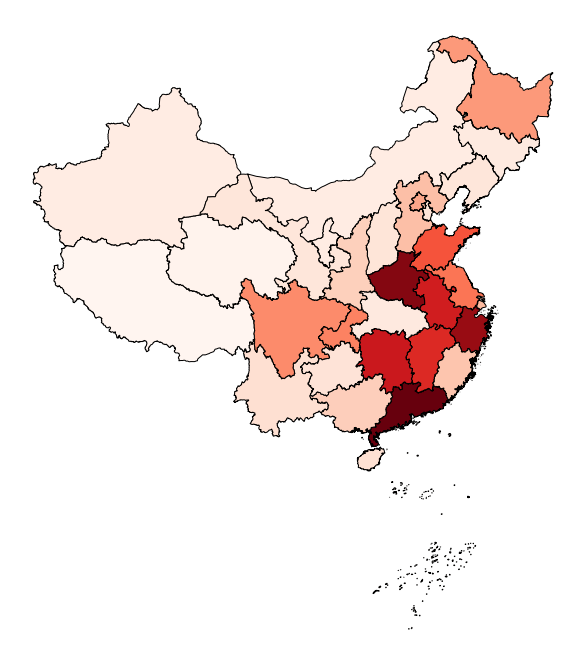

In [72]:
fig, ax = plt.subplots(figsize=(12, 12))

# 新增缺失值处理参数
ax = data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                 column='province_confirmedCount',
                                                 cmap='Reds',
                                                 edgecolor='black',
#                                                 missing_kwds={
#                                                     "color": "lightgrey",
#                                                     "edgecolor": "black",
#                                                     "hatch": "////"
#                                                 })
                                                )



ax.axis('off')


(-2867423.590453673, 2448969.591859171, 131110.39344352327, 6197217.979800974)

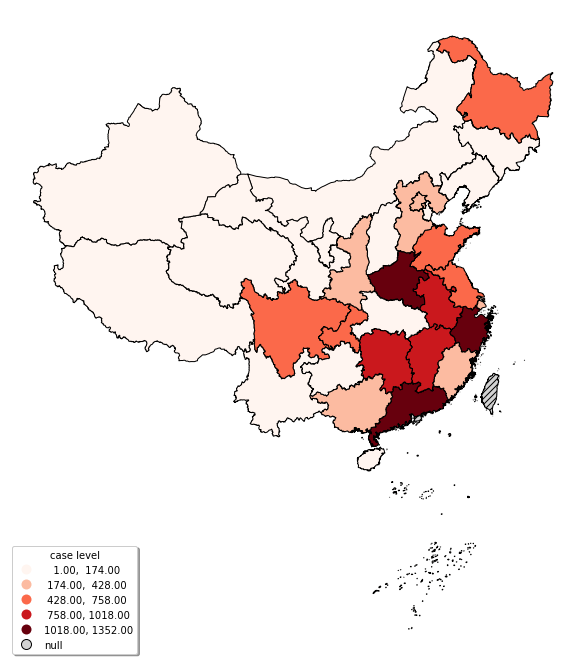

In [73]:
fig, ax = plt.subplots(figsize=(12, 12))

ax = data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                 column='province_confirmedCount',
                                                 cmap='Reds',
                                                 edgecolor='black',
                                                 missing_kwds={
                                                     "color": "lightgrey",
                                                     "edgecolor": "black",
                                                     "hatch": "////",
                                                     "label": "null"
                                                 },
                                                 legend=True,
                                                 scheme='NaturalBreaks',
                                                 k=5,
                                                 legend_kwds={
                                                     'loc': 'lower left',
                                                     'title': 'case level',
                                                     'shadow': True
                                                 })



ax.axis('off')

(-5772.249406041359, 1111796.1525140794, 3014369.71808951, 4485503.561305371)

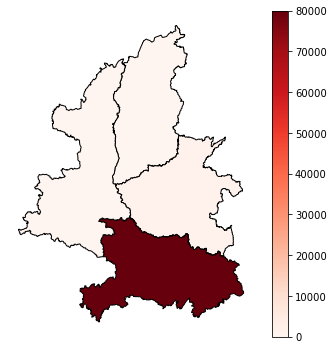

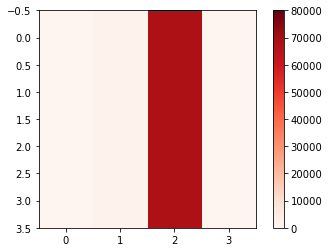

In [77]:

fig, ax = plt.subplots(figsize=(6, 6))

pic=data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                 column='province_confirmedCount',
                                                 cmap='Reds',
                                                 edgecolor='black',
                                                 missing_kwds={
                                                     "color": "lightgrey",
                                                     "edgecolor": "black",
                                                     "hatch": "////"
                                                 },
                                                 
                                                 legend=False)

value=[]
df=data_with_geometry.to_crs(albers_proj)
# print(type(data_with_geometry.to_crs(albers_proj))) 
# print(data_with_geometry.to_crs(albers_proj))
#获取province_confirmedCount的值组成list
for it in df.iloc:
   v=df.loc[it.name,'province_confirmedCount']
   value.append(v)

fig2,ax2=plt.subplots()
img=np.zeros((len(value),len(value)))
for i in range(len(value)):#扩展list成为一个二维矩阵，用来实现imshow画图
    img[:,i]=value[i]
pic2=ax2.imshow(img,cmap='Reds',vmin=0,vmax=80000)#随意控制colorbar的范围
plt.colorbar(pic2)
fig.colorbar(pic2,ax=ax)#把ax2的colorbar画在ax上
ax.axis('off')



In [166]:
data_with_geometry = pd.merge(left=temp.replace('澳门', '澳门特别行政区'),
                              right=china,
                              left_on='provinceName',
                              right_on='OWNER',
                              how='right'
                              ).loc[:, ['provinceName',
                                        'provinceEnglishName',
                                        'province_confirmedCount',
                                        'province_suspectedCount',
                                        'province_curedCount',
                                        'province_deadCount',
                                        'geometry'
                                        ]]
data_with_geometry.loc[21,"province_confirmedCount"]=0
data_with_geometry=data_with_geometry[(data_with_geometry['provinceEnglishName']=="Shanxi")|(data_with_geometry['provinceEnglishName']=="Henan")
                                     |(data_with_geometry['provinceEnglishName']=="Hubei")|(data_with_geometry['provinceEnglishName']=="Shaanxi")]

                      
# Treansform data from DataFrame to GeoDataFrame
data_with_geometry = gpd.GeoDataFrame(data_with_geometry, crs='EPSG:4326')
data_with_geometry

,provinceName,provinceEnglishName,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,geometry
11,山西省,Shanxi,133.0,0.0,126.0,0.0,"POLYGON ((114.12488 40.74365, 114.13085 40.738..."
18,河南省,Henan,1272.0,0.0,1247.0,22.0,"MULTIPOLYGON (((111.00577 33.17373, 111.00714 ..."
21,湖北省,Hubei,0.0,0.0,45235.0,2986.0,"MULTIPOLYGON (((110.98971 33.24940, 110.99007 ..."
30,陕西省,Shaanxi,245.0,0.0,227.0,1.0,"POLYGON ((111.11640 39.36374, 111.11701 39.363..."


In [167]:
splits = 10000 # number of individual colours to use in full version 
halfway = int(splits/2) # number of individual colours to use in truncated version
colour_values = mpl.cm.Blues(np.linspace(0, 1, splits)) # list of rgb colours for full version
# np.linspace: Return evenly spaced numbers over a specified interval (in this case 0 - 1)

In [168]:
trunc_colours = colour_values[0:halfway,:] # row 0 to halfway
trunc_cmap = mpl.colors.ListedColormap(trunc_colours)

full_colours = colour_values[:,:] # all rows, all columns
full_cmap = mpl.colors.ListedColormap(full_colours)

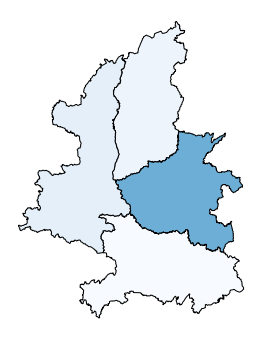

In [169]:
fig, ax = plt.subplots(figsize=(6, 6))

ax = data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                 column='province_confirmedCount',
                                                 cmap=trunc_cmap,
                                                 edgecolor='black',
                                                 legend=False
                                                 
                                                 )
ax.plot()

ax.axis('off')
fig.savefig('1_1.png', dpi=300)

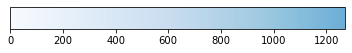

In [170]:
fig, ax = plt.subplots(figsize=(6, 0.4))
 
fig.colorbar(mpl.cm.ScalarMappable(
    norm=mpl.colors.Normalize(vmin=0, vmax=1272),
    cmap=trunc_cmap),
    cax=ax, 
    orientation='horizontal', 
            )


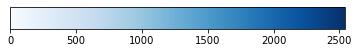

In [171]:

fig, ax = plt.subplots(figsize=(6, 0.4))
fig.colorbar(mpl.cm.ScalarMappable(
    norm=mpl.colors.Normalize(vmin=0, vmax=1272*2),
    cmap=full_cmap),
             cax=ax, orientation='horizontal')

In [137]:
splits = 1000 # number of individual colours to use in full version 
halfway = int(splits/2) # number of individual colours to use in truncated version
colour_values = mpl.cm.Reds(np.linspace(0, 1, splits)) # list of rgb colours for full version
# np.linspace: Return evenly spaced numbers over a specified interval (in this case 0 - 1)
trunc_colours = colour_values[0:halfway,:] # row 0 to halfway
trunc_cmap = mpl.colors.ListedColormap(trunc_colours)

full_colours = colour_values[:,:] # all rows, all columns
full_cmap = mpl.colors.ListedColormap(full_colours)

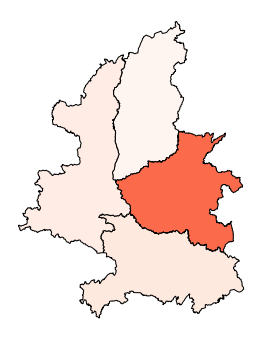

In [138]:
fig, ax = plt.subplots(figsize=(6, 6))

ax = data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                 column='province_confirmedCount',
                                                 cmap=trunc_cmap,
                                                 edgecolor='black',
                                                 legend=False
                                                 
                                                 )
ax.plot()

ax.axis('off')
fig.savefig('2_1.png', dpi=300)